In [111]:
import pandas as pd
import seaborn as sns

df_real_estate = pd.read_excel('data/home.xlsx')
# just keeping recent data
df_real_estate = df_real_estate.loc[df_real_estate['Date'] > '2018-12-01']

# calculate some monthly changes
df_real_estate['Composite_Benchmark_Change'] = df_real_estate[['Composite_Benchmark']].pct_change()['Composite_Benchmark']

df_real_estate = df_real_estate[['Date', 'Composite_Benchmark_Change', 'Single_Family_Benchmark_Change', 'Apartment_Benchmark_Change']]

df_real_estate

KeyError: "['Single_Family_Benchmark_Change', 'Apartment_Benchmark_Change'] not in index"

In [91]:
inflation_df = pd.read_csv('data/CPI_MONTHLY.csv')

# keep recent data
inflation_df = inflation_df.loc[inflation_df['date'] > '2018-12-01']
# drop other columns
inflation_df = inflation_df[['date', 'V41690973']]
inflation_df = inflation_df.rename(columns={"date": "Date"})
# get monthly change
inflation_df['Inflation_Change'] = inflation_df[['V41690973']].pct_change()['V41690973'] 


inflation_df = inflation_df[['Date', 'Inflation_Change']]
inflation_df

,Date,Inflation_Change
288,2019-01-01,NaN
289,2019-02-01,0.006737
290,2019-03-01,0.006691
291,2019-04-01,0.004431
292,2019-05-01,0.004412
293,2019-06-01,-0.002196
294,2019-07-01,0.005136
295,2019-08-01,-0.001460
296,2019-09-01,-0.004386
297,2019-10-01,0.002937


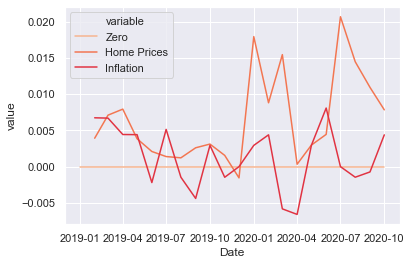

In [158]:


# df_real_estate.merge(inflation_df, on="Date")
len(inflation_df)
df_real_estate['Inflation_Change'] = inflation_df['Inflation_Change'].values
df_real_estate['Zero'] = 0
df = df_real_estate[['Date', 'Zero', 'Composite_Benchmark_Change', 'Inflation_Change']]

sns.set_palette("rocket_r")


sns.lineplot(x='Date', y='value', hue='variable', 
             data=pd.melt(df.rename(columns={'Composite_Benchmark_Change': 'Home Prices', 'Inflation_Change': 'Inflation'}), ['Date']))
